In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.dates as dates
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import IPython
from IPython.core.display import HTML
from IPython.display import Image
import IPython.core.display as di
import matplotlib.cm as cm

import matplotlib.patches as mpatches

In [2]:
def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')

def parsedatetime(x):
    return datetime.strptime(x[:-3], '%Y-%m-%d %H:%M')

def parsedatetime2(x):
    return datetime.strptime(x[:-3], '%d/%m/%Y %H:%M')

def createddatatime(data, time):
    result = data + ' '+ time
    return datetime.strptime(result[:-3], '%Y-%m-%d %H:%M')
    

def convToInt(val):
    try:
        result = re.sub('\W', '' , val)
        result = re.sub('\D', '' , result)
        return int(result)
    except:
        return 0
    
def convToFloat(val):
    try:
        #result = re.sub('\W', '' , val)
        #result = re.sub('\D', '' , val)
        return float(val)
    except:
        return 0
    

def convToSegundo(val):
    print(val)
    result = re.sub('\W', '' , val)
    val = int(result)
    
    return val/1000000

def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile

def diminuiruri(val):
    result = re.sub('\?clientId.+$', '' , val)
    return result[:38]

In [5]:
dadosAccesslog = pd.read_csv('srvaccesslog.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['data', 'time', 'host', 'Metodo', 'uri' ,'status', 'bytes', 'timetaken'],
                   converters={
                              'timetaken': convToFloat
                              }
                   )

dadosAccesslog['datatime'] = [createddatatime(x, y) for x, y in dadosAccesslog[['data', 'time']].values]

dadosAccesslog = dadosAccesslog.set_index('datatime')
dadosAccesslog.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,data,time,host,Metodo,uri,status,bytes,timetaken
datatime,,,,,,,,
2021-03-05 16:02:00,2021-03-05,16:02:26,"""10.240.49.145""",GET,/shub/getPlafondsDetailsPlus,200,18495,0.065
2021-03-05 16:02:00,2021-03-05,16:02:27,"""10.240.41.30""",GET,/shub/getRechargePlafond,406,0,0.194
2021-03-05 16:02:00,2021-03-05,16:02:27,"""10.240.41.42""",GET,/shub/getRechargePlafond,200,871,0.185
2021-03-05 16:02:00,2021-03-05,16:02:27,"""10.240.49.139""",GET,/shub/getPlafondsDetailsPlus,200,18558,0.319
2021-03-05 16:02:00,2021-03-05,16:02:27,"""10.240.49.138""",GET,/shub/getPlafondsDetailsPlus,200,13735,0.379


In [6]:
datasetreq200 = dadosAccesslog.loc[ (dadosAccesslog['status'] < 400)]
#datasetreq200['URIck'] = [diminuiruri(x) for x in datasetreq200['uri'].values]

In [7]:
datasetreq200['2021-03-05 15:18:00':'2021-03-05 15:18:00'].head(10)

,data,time,host,Metodo,uri,status,bytes,timetaken
datatime,,,,,,,,
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.144""",GET,/shub/getPlafondsDetailsPlus,200,12467,0.171
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.142""",GET,/shub/getPlafondsDetailsPlus,200,13107,12.477
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.41.33""",GET,/shub/getRechargePlafond,200,874,0.182
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.145""",GET,/shub/getPlafondsDetailsPlus,200,13076,0.229
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.136""",GET,/shub/getPlafondsDetailsPlus,200,21275,0.220
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.41.25""",GET,/shub/getRechargePlafond,200,869,0.252
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.141""",GET,/shub/getPlafondsDetailsPlus,200,13135,0.244
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.142""",GET,/shub/getPlafondsDetailsPlus,200,13019,0.313
2021-03-05 15:18:00,2021-03-05,15:18:00,"""10.240.49.139""",GET,/shub/getPlafondsDetailsPlus,200,14441,0.167


In [5]:
gpreqsmaislentas = datasetreq200.groupby(['uri']).agg({    
        'timetaken': ['max', 'mean', percentile(90.)],
        'uri':['count']
    })

gpreqsmaislentas.columns = ['max timetaken', 'mean timetaken', 'Perc90 timetaken', 'Qtd Request']
gpreqsmaislentas =  gpreqsmaislentas.sort_values(by=['max timetaken'],ascending=False)
gpreqsmaislentas.head(10)

,max timetaken,mean timetaken,Perc90 timetaken,Qtd Request
uri,,,,
/shub/getPlafondsDetailsPlus,15.941,0.274909,0.2850,1136086
/shub/getDetailedBalanceMultDataPosPaid,14.773,0.330485,0.3360,89364
/shub/getHierarchyPlafond,13.865,0.312522,0.2831,1840
/shub/getRechargePlafond,10.056,0.154885,0.2220,157238
/shub,5.892,0.196269,0.1920,268


In [6]:
datasetlt = datasetreq200.groupby(['datatime', 'uri']).agg({    
        'timetaken': ['max', 'mean', percentile(90.)],
        'uri':['count']
    })

datasetlt.columns = ['max timetaken', 'mean timetaken', 'Perc90 timetaken', 'Qtd Request']
datasetlt = datasetlt.reset_index()
#datasetlt = datasetlt.set_index('datatime')
datasetlttk = pd.pivot_table(datasetlt, 
                              index='datatime', 
                              columns = 'uri' , 
                              values='Perc90 timetaken', 
                              aggfunc={'Perc90 timetaken': ['mean']})
datasetlttk.columns = ['/shub','/shub/getDetailedBalanceMultDataPosPai', '/shub/getHierarchyPlafond', '/shub/getPlafondsDetailsPlus', '/shub/getRechargePlafond']
for col in datasetlttk.columns:
    datasetlttk[col].fillna(0, inplace=True)

datasetltReq = pd.pivot_table(datasetlt, 
                              index='datatime', 
                              columns = 'uri' , 
                              values='Qtd Request', 
                              aggfunc={'Qtd Request': ['sum']})
datasetltReq.columns = ['/shub','/shub/getDetailedBalanceMultDataPosPai', '/shub/getHierarchyPlafond', '/shub/getPlafondsDetailsPlus', '/shub/getRechargePlafond']
for col in datasetltReq.columns:
    datasetltReq[col].fillna(0, inplace=True)
  
datasetltReq.head()   
#datasetlttk.head()

,/shub,/shub/getDetailedBalanceMultDataPosPai,/shub/getHierarchyPlafond,/shub/getPlafondsDetailsPlus,/shub/getRechargePlafond
datatime,,,,,
2021-03-05 13:34:00,0.0,28.0,0.0,424.0,44.0
2021-03-05 13:35:00,0.0,184.0,12.0,2436.0,336.0
2021-03-05 13:36:00,0.0,152.0,12.0,2456.0,332.0
2021-03-05 13:37:00,0.0,196.0,0.0,2488.0,364.0
2021-03-05 13:38:00,0.0,160.0,0.0,2444.0,280.0


In [31]:
datasetltReq.tail() 

,/shub,/shub/getDetailedBalanceMultDataPosPai,/shub/getHierarchyPlafond,/shub/getPlafondsDetailsPlus,/shub/getRechargePlafond
datatime,,,,,
2021-03-05 16:12:00,0.0,232.0,0.0,2980.0,400.0
2021-03-05 16:13:00,0.0,168.0,4.0,2928.0,476.0
2021-03-05 16:14:00,0.0,244.0,8.0,3116.0,360.0
2021-03-05 16:15:00,0.0,204.0,0.0,2974.0,400.0
2021-03-05 16:16:00,0.0,172.0,4.0,2332.0,320.0


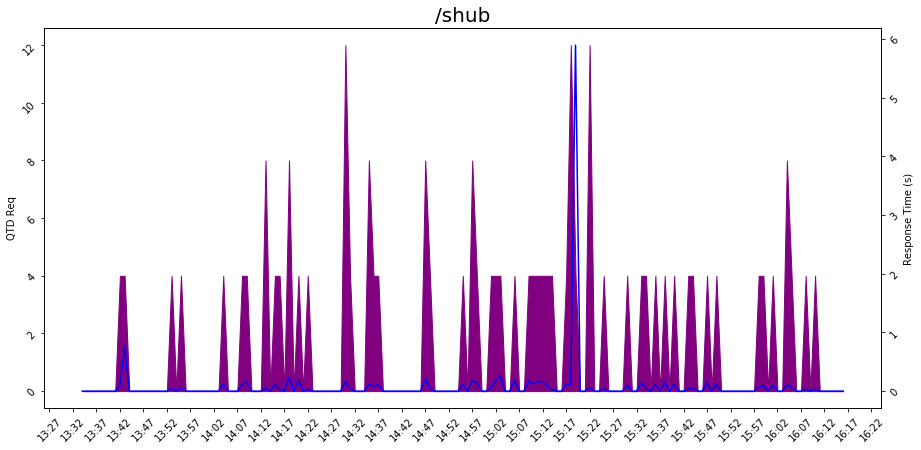

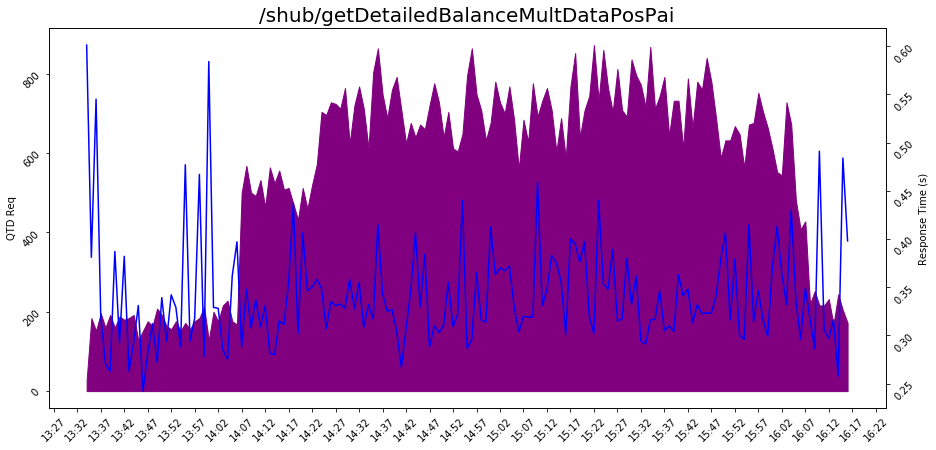

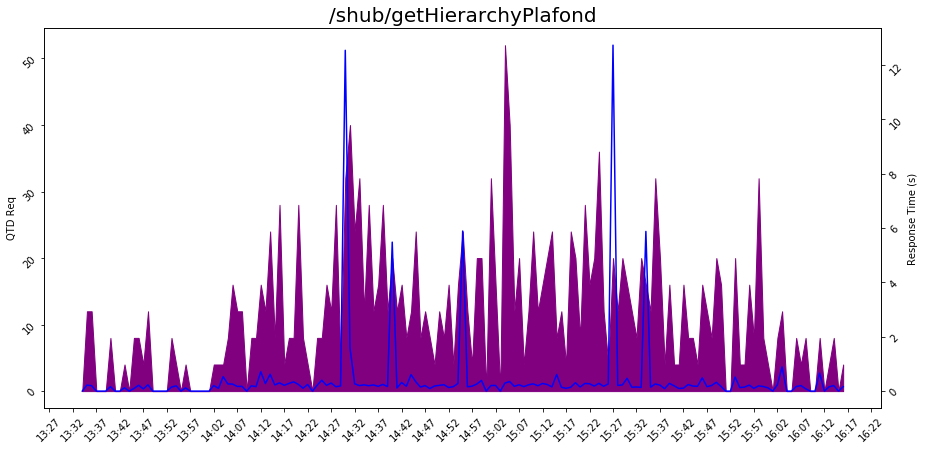

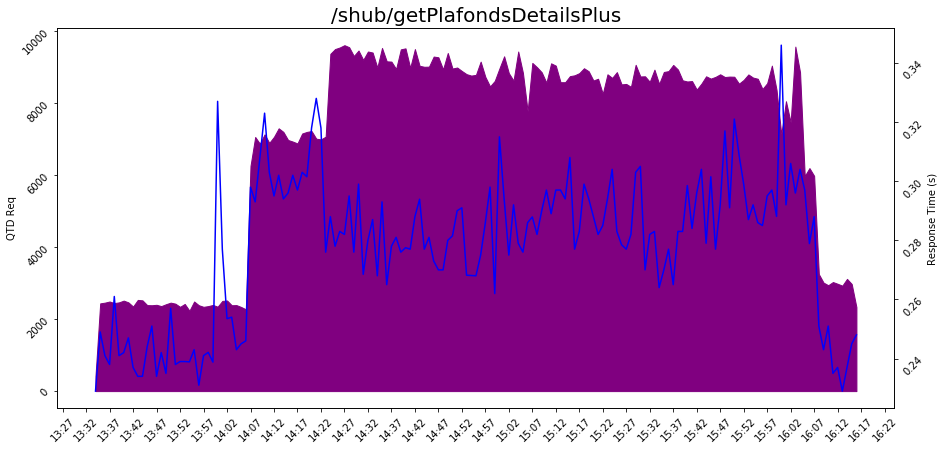

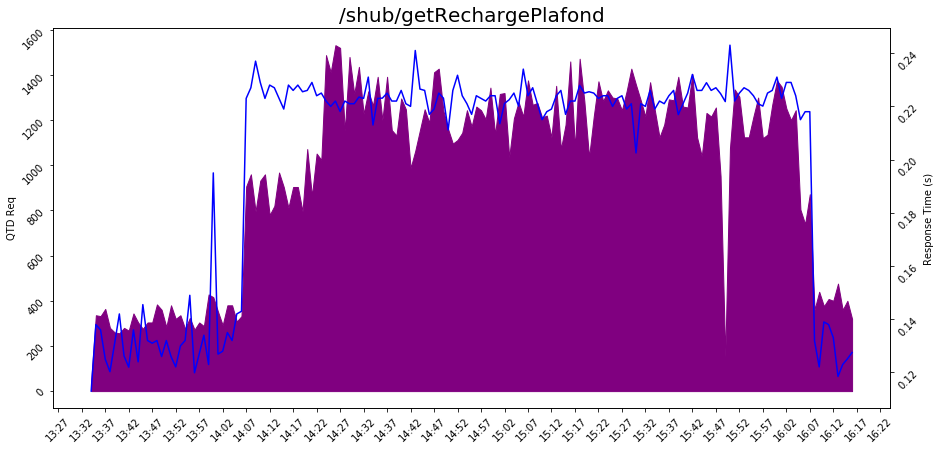

In [7]:
def gerarGrafico(dftk, dfreq, col):
    fig, ax1 = plt.subplots(figsize=(15,7))
    
    grfc1 = ax1.stackplot(dfreq.index, dfreq[col], color='purple')
    ax1.set_ylabel("QTD Req")
    ax1.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax1.tick_params(labelrotation=45)
    ax1.xaxis.set_major_locator(dates.MinuteLocator(byminute=None, interval=3))
    
    ax2 = ax1.twinx() 
    grfc2 = ax2.plot(dftk.index, dftk[col], color='blue')
    ax2.set_ylabel("Response Time (s)")
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax2.tick_params(labelrotation=45)
    ax2.xaxis.set_major_locator(dates.MinuteLocator(byminute=None, interval=5))
    plt.title(col, fontsize=20)

for col in datasetltReq.columns:
    datasetltReq.head()   
    datasetlttk.head()
    gerarGrafico(datasetlttk,datasetltReq, col)
    
    



AttributeError: 'AxesSubplot' object has no attribute 'set_major_locator'

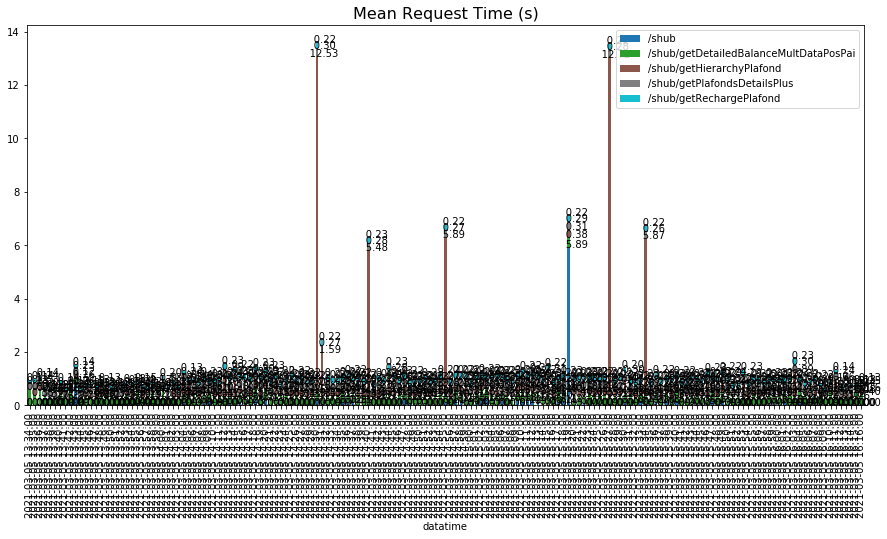

In [30]:
barplot = datasetlttk.plot.bar(figsize=(15, 7), colormap='tab10', stacked=True)
for p in barplot.patches:
    b = p.get_bbox()
    plt.text(b.x0, b.y1, "{:10.2f}".format(b.y1 - b.y0 )  , ha='center')        
    plt.title('Mean Request Time (s)', fontsize=16)
barplot.set_major_locator(dates.MinuteLocator(byminute=None, interval=5))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

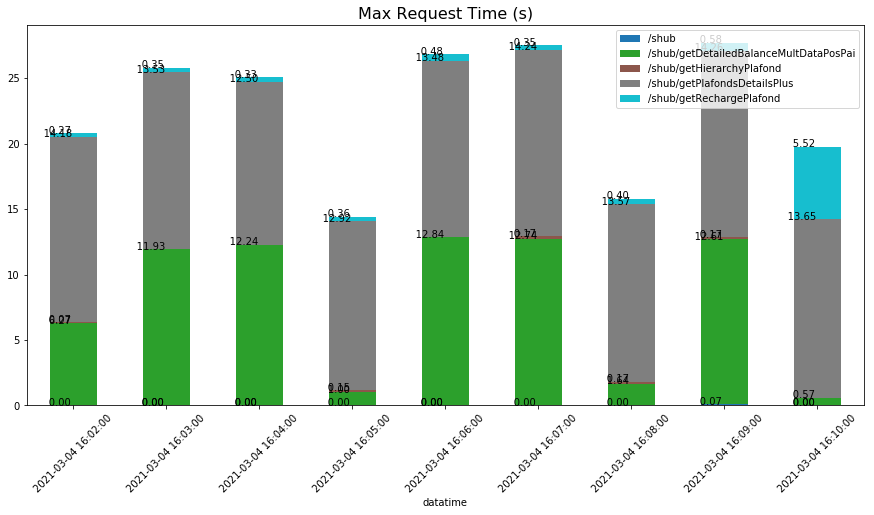

In [62]:
datasetlttkmx = pd.pivot_table(datasetlt, 
                              index='datatime', 
                              columns = 'URIck' , 
                              values='max timetaken', 
                              aggfunc={'max timetaken': ['max']})
datasetlttkmx.columns = ['/shub','/shub/getDetailedBalanceMultDataPosPai', '/shub/getHierarchyPlafond', '/shub/getPlafondsDetailsPlus', '/shub/getRechargePlafond']
for col in datasetlttkmx.columns:
    datasetlttkmx[col].fillna(0, inplace=True)


barplot = datasetlttkmx.plot.bar(figsize=(15, 7), colormap='tab10', stacked=True)
for p in barplot.patches:
    b = p.get_bbox()
    plt.text(b.x0, b.y1, "{:10.2f}".format(b.y1 - b.y0 )  , ha='center')        
    plt.title('Max Request Time (s)', fontsize=16)
plt.xticks(rotation=45)

In [8]:
dadoswaitevents = pd.read_csv('wait_event.csv',
                   sep=';',
                   engine='python', 
                   na_values='-', 
                   header=None,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['WAIT_DATE','INSTANCE','EVENT','WAIT_CLASS','MIN_WAIT','AVG_WAIT','P90_WAIT','P95_WAIT','P99_WAIT','MAX_WAIT'],
                   converters={'WAIT_DATE': parsedatetime2,
                              ('MIN_WAIT', 'AVG_WAIT','P90_WAIT','P95_WAIT','P99_WAIT','MAX_WAIT'): convToFloat
                              }
                   )
dadoswaitevents = dadoswaitevents.set_index('WAIT_DATE')
dadoswaitevents.head()

,INSTANCE,EVENT,WAIT_CLASS,MIN_WAIT,AVG_WAIT,P90_WAIT,P95_WAIT,P99_WAIT,MAX_WAIT
WAIT_DATE,,,,,,,,,
2021-02-06 01:00:00,1,ASM file metadata operation,Other,0.29,0.29,0.29,0.29,0.29,0.29
2021-02-06 01:00:00,1,Backup: MML command to channel,Administrative,0.30,0.30,0.30,0.30,0.30,0.30
2021-02-06 01:00:00,1,Backup: MML commit backup piece,Administrative,12.27,12.27,12.27,12.27,12.27,12.27
2021-02-06 01:00:00,1,Backup: MML create a backup piece,Administrative,4.05,4.05,4.05,4.05,4.05,4.05
2021-02-06 01:00:00,1,Backup: MML query backup piece,Administrative,0.43,0.43,0.43,0.43,0.43,0.43


In [12]:
dfFiltro = dadoswaitevents['2021-02-03 15:00': '2021-02-09 17:00']
dfFiltro.head()

,INSTANCE,EVENT,WAIT_CLASS,MIN_WAIT,AVG_WAIT,P90_WAIT,P95_WAIT,P99_WAIT,MAX_WAIT
WAIT_DATE,,,,,,,,,
2021-02-06 01:00:00,1,ASM file metadata operation,Other,0.29,0.29,0.29,0.29,0.29,0.29
2021-02-06 01:00:00,1,Backup: MML command to channel,Administrative,0.30,0.30,0.30,0.30,0.30,0.30
2021-02-06 01:00:00,1,Backup: MML commit backup piece,Administrative,12.27,12.27,12.27,12.27,12.27,12.27
2021-02-06 01:00:00,1,Backup: MML create a backup piece,Administrative,4.05,4.05,4.05,4.05,4.05,4.05
2021-02-06 01:00:00,1,Backup: MML query backup piece,Administrative,0.43,0.43,0.43,0.43,0.43,0.43


In [13]:
#dfFiltro = dfFiltro.loc[(dfFiltro['INSTANCE'] == 1)]

gpeventstop = dfFiltro.groupby(['EVENT']).agg({    
    'MIN_WAIT': [percentile(90.)]
})
gpeventstop.columns = ['MIN_WAIT']
gpeventstop =  gpeventstop.sort_values(by=['MIN_WAIT'],ascending=False)
gpeventstop = gpeventstop.reset_index()
gpeventstop.head()

,EVENT,MIN_WAIT
0,CPU,77.290
1,recovery area: computing obsolete files,42.110
2,RMAN backup & recovery I/O,34.530
3,Backup: MML create a backup piece,15.800
4,enq: IV - contention,14.942


In [3]:
dadosqueriesevents = pd.read_csv('top_queries_by_event.csv',
                   sep=';',
                   engine='python', 
                   na_values='-', 
                   header=1,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['PERC','INSTANCE','EVENT','MODULE','SCHEMA','SQL_ID','BG','BG_BY_EXEC','DR','DR_BY_EXEC','CPU','CPU_BY_EXEC','ELAP','ELAP_BY_EXEC','PARSE','EXEC','SQL_TEXT_SHORT'],
                   converters={
                              ('PERC','CPU','CPU_BY_EXEC','ELAP','ELAP_BY_EXEC','PARSE','EXEC'): convToFloat
                              }
                   )
dadosqueriesevents = dadosqueriesevents.set_index('INSTANCE')

dadosqueriesevents = dadosqueriesevents.loc[(dadosqueriesevents.index == 2)]
dadosqueriesevents =  dadosqueriesevents.sort_values(by=['PERC'],ascending=False)

In [4]:
dfFiltroqrevents = dadosqueriesevents.loc[(dadosqueriesevents['EVENT'].str.contains('CPU') == True )]
#dfFiltroqrevents.head()
dfFiltroqrevents.head(20)

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
2,50.91,CPU,DBMS_SCHEDULER,OLHOVIVO,8qxjwck9a5run,2531899.0,1.00,0.0,0.0,7107.08,0.00,7427.06,0.00,2526302.0,2526302.0,"SELECT SID,SERIAL#,LOGON_TIME,AU"
2,9.28,CPU,DBMS_SCHEDULER,SYS,4yyb4104skrwj,321261.0,4.06,0.0,0.0,200.05,0.00,253.76,0.00,460771.0,79214.0,"update obj$ set obj#=:4, type#=:"
2,9.06,CPU,NaN,SYS,g4gp07gt2z920,3171789.0,7.05,0.0,0.0,304.17,0.00,617.79,0.00,450019.0,450020.0,update sys.scheduler$_job set l
2,6.31,CPU,DBMS_SCHEDULER,SYS,1t37gmtdw6r4j,3181379.0,10.16,0.0,0.0,112.35,0.00,292.37,0.00,313004.0,313004.0,update sys.scheduler$_job set n
2,4.06,CPU,DBMS_SCHEDULER,SYS,1kz16yhs993h2,2002848.0,9.92,0.0,0.0,70.91,0.00,124.04,0.00,201822.0,201822.0,insert into sys.scheduler$_event
2,3.48,CPU,DBMS_SCHEDULER,SYS,1k5c5twx2xr01,1532483.0,8.87,0.0,0.0,42.96,0.00,92.17,0.00,172702.0,172702.0,insert into sys.scheduler$_job_r
2,2.47,CPU,DBMS_SCHEDULER,OLHOVIVO,5jm2yazmx0pc6,3376320.0,27.59,0.0,0.0,15.88,0.00,16.68,0.00,122356.0,122356.0,"SELECT SID, SERIAL#, 1 AS FG_DIS"
2,1.60,CPU,DBMS_SCHEDULER,SYS,1gfaj4z5hn1kf,316174.0,2.00,0.0,0.0,3.01,0.00,11.51,0.00,158087.0,158087.0,delete from dependency$ where d_
2,1.52,CPU,DBMS_SCHEDULER,OLHOVIVO,4z2at9d1natrv,0.0,0.00,0.0,0.0,2.79,0.00,6.90,0.00,75583.0,75584.0,SELECT INSTANCE_NUMBER FROM V$IN


In [46]:
dadosqueriesstats = pd.read_csv('top_queries_by_stats.csv',
                   sep=';',
                   engine='python', 
                   na_values='-', 
                   header=1,
                   #usecols=[0, 3, 5, 6, 7, 8, 9],
                   names=['RANK_BG','PCT_BG','RANK_DR','PCT_DR','RANK_CPU','PCT_CPU','RANK_ELAP','PCT_ELAP',
                          'RANK_PARSE','PCT_PARSE','RANK_EXEC','PCT_EXEC','FLAG','SQL_ID','INSTANCE',
                          'BG','DR','CPU','ELAP','PARSE','EXEC','MODULE','SCHEMA'],
                   converters={
                              ('RANK_BG','PCT_BG','RANK_DR','PCT_DR','RANK_CPU','PCT_CPU','RANK_ELAP','PCT_ELAP',
                          'RANK_PARSE','PCT_PARSE','RANK_EXEC','PCT_EXEC','FLAG','CPU','ELAP','PARSE','EXEC'): convToFloat
                              }
                   )
dadosqueriesstats = dadosqueriesstats.set_index('RANK_CPU')
dadosqueriesstats =  dadosqueriesstats.sort_values(by=['RANK_CPU'],ascending=True)
dadosqueriesstats.head()

,RANK_BG,PCT_BG,RANK_DR,PCT_DR,PCT_CPU,RANK_ELAP,PCT_ELAP,RANK_PARSE,PCT_PARSE,RANK_EXEC,...,SQL_ID,INSTANCE,BG,DR,CPU,ELAP,PARSE,EXEC,MODULE,SCHEMA
RANK_CPU,,,,,,,,,,,,,,,,,,,,,
1,232,0.0,48,0.0,27.8,1,23.6,86,0.0,92,...,0az7czjdw8z7j,1,0.0,0.0,12800.8,12859.0,717.0,720.0,NaN,SYS
1,1,27.6,16,0.1,36.8,1,30.7,9,6.3,7,...,0gyt62ha5adv7,2,147983881.0,40.0,8703.5,9646.0,2590870.0,2590873.0,DBMS_SCHEDULER,OLHOVIVO
2,23,0.5,1007,0.0,30.8,2,24.2,10,6.3,9,...,8qxjwck9a5run,2,2595184.0,0.0,7281.8,7613.2,2590869.0,2590869.0,DBMS_SCHEDULER,OLHOVIVO
3,26,0.4,229,0.0,17.1,3,14.9,11,6.2,9,...,8qxjwck9a5run,1,2594962.0,0.0,7865.1,8124.5,2590560.0,2590560.0,DBMS_SCHEDULER,OLHOVIVO
3,8,3.4,611,0.0,7.4,3,11.4,7,6.3,6,...,g4gp07gt2z920,2,18263835.0,0.0,1752.4,3576.6,2591101.0,2591104.0,NaN,SYS


In [43]:
dadosqueriesstats =  dadosqueriesstats.sort_values(by=['RANK_EXEC'],ascending=True)
dadosqueriesstats = dadosqueriesstats.loc[(dadosqueriesstats['INSTANCE'] == 2)
                                         & (dadosqueriesstats['SCHEMA'] == 'OLHOVIVO')]
dadosqueriesstats.head()

,RANK_BG,PCT_BG,RANK_DR,PCT_DR,PCT_CPU,RANK_ELAP,PCT_ELAP,RANK_PARSE,PCT_PARSE,RANK_EXEC,...,SQL_ID,INSTANCE,BG,DR,CPU,ELAP,PARSE,EXEC,MODULE,SCHEMA
RANK_CPU,,,,,,,,,,,,,,,,,,,,,
13,1600,0.0,1416,0.0,0.4,12,0.7,5,6.3,4,...,4z2at9d1natrv,2,0.0,0.0,90.7,231.7,2591224.0,2591233.0,DBMS_SCHEDULER,OLHOVIVO
1,1,27.6,16,0.1,36.8,1,30.7,9,6.3,7,...,0gyt62ha5adv7,2,147983881.0,40.0,8703.5,9646.0,2590870.0,2590873.0,DBMS_SCHEDULER,OLHOVIVO
2,23,0.5,1007,0.0,30.8,2,24.2,10,6.3,9,...,8qxjwck9a5run,2,2595184.0,0.0,7281.8,7613.2,2590869.0,2590869.0,DBMS_SCHEDULER,OLHOVIVO
11,17,1.0,1419,0.0,0.5,15,0.4,11,6.3,10,...,5qm0aaxxq56wz,2,5182538.0,0.0,114.6,124.3,2590868.0,2590869.0,DBMS_SCHEDULER,OLHOVIVO
10,3,12.8,1011,0.0,0.7,13,0.6,12,6.3,11,...,9kh5nw5dh11fw,2,68678005.0,0.0,169.0,176.5,2587298.0,2587298.0,DBMS_SCHEDULER,OLHOVIVO


In [45]:


    
dtqueries = dfFiltroqrevents.loc[
    (dfFiltroqrevents['SQL_ID'].isin(dadosqueriesstats['SQL_ID'].head()))
     ]
dtqueries

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
2,50.91,CPU,DBMS_SCHEDULER,OLHOVIVO,8qxjwck9a5run,2531899.0,1.00,0.0,0.0,7107.08,0.0,7427.06,0.0,2526302.0,2526302.0,"SELECT SID,SERIAL#,LOGON_TIME,AU"
2,1.52,CPU,DBMS_SCHEDULER,OLHOVIVO,4z2at9d1natrv,0.0,0.00,0.0,0.0,2.79,0.0,6.90,0.0,75583.0,75584.0,SELECT INSTANCE_NUMBER FROM V$IN
2,1.23,CPU,DBMS_SCHEDULER,OLHOVIVO,9kh5nw5dh11fw,1625689.0,26.53,0.0,0.0,4.03,0.0,4.24,0.0,61276.0,61276.0,"SELECT INST_ID, SID, SERIAL# FRO"
2,0.87,CPU,DBMS_SCHEDULER,OLHOVIVO,5qm0aaxxq56wz,86444.0,2.00,0.0,0.0,1.98,0.0,2.25,0.0,43222.0,43222.0,SELECT VALUE FROM TB_OLV_CFG WHE


In [47]:
dadosqueriesstats =  dadosqueriesstats.sort_values(by=['RANK_ELAP'],ascending=True)
dadosqueriesstats = dadosqueriesstats.loc[(dadosqueriesstats['INSTANCE'] == 2)
                                         & (dadosqueriesstats['SCHEMA'] == 'OLHOVIVO')]
dadosqueriesstats.head()

,RANK_BG,PCT_BG,RANK_DR,PCT_DR,PCT_CPU,RANK_ELAP,PCT_ELAP,RANK_PARSE,PCT_PARSE,RANK_EXEC,...,SQL_ID,INSTANCE,BG,DR,CPU,ELAP,PARSE,EXEC,MODULE,SCHEMA
RANK_CPU,,,,,,,,,,,,,,,,,,,,,
1,1,27.6,16,0.1,36.8,1,30.7,9,6.3,7,...,0gyt62ha5adv7,2,147983881.0,40.0,8703.5,9646.0,2590870.0,2590873.0,DBMS_SCHEDULER,OLHOVIVO
2,23,0.5,1007,0.0,30.8,2,24.2,10,6.3,9,...,8qxjwck9a5run,2,2595184.0,0.0,7281.8,7613.2,2590869.0,2590869.0,DBMS_SCHEDULER,OLHOVIVO
8,2,13.3,1415,0.0,1.4,10,1.1,13,6.3,12,...,5jm2yazmx0pc6,2,71267133.0,0.0,329.4,352.8,2587287.0,2587287.0,DBMS_SCHEDULER,OLHOVIVO
13,1600,0.0,1416,0.0,0.4,12,0.7,5,6.3,4,...,4z2at9d1natrv,2,0.0,0.0,90.7,231.7,2591224.0,2591233.0,DBMS_SCHEDULER,OLHOVIVO
10,3,12.8,1011,0.0,0.7,13,0.6,12,6.3,11,...,9kh5nw5dh11fw,2,68678005.0,0.0,169.0,176.5,2587298.0,2587298.0,DBMS_SCHEDULER,OLHOVIVO


In [48]:
    
dtqueries2 = dfFiltroqrevents.loc[
    (dfFiltroqrevents['SQL_ID'].isin(dadosqueriesstats['SQL_ID'].head()))
     ]
dtqueries2

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
2,50.91,CPU,DBMS_SCHEDULER,OLHOVIVO,8qxjwck9a5run,2531899.0,1.00,0.0,0.0,7107.08,0.0,7427.06,0.0,2526302.0,2526302.0,"SELECT SID,SERIAL#,LOGON_TIME,AU"
2,2.47,CPU,DBMS_SCHEDULER,OLHOVIVO,5jm2yazmx0pc6,3376320.0,27.59,0.0,0.0,15.88,0.0,16.68,0.0,122356.0,122356.0,"SELECT SID, SERIAL#, 1 AS FG_DIS"
2,1.52,CPU,DBMS_SCHEDULER,OLHOVIVO,4z2at9d1natrv,0.0,0.00,0.0,0.0,2.79,0.0,6.90,0.0,75583.0,75584.0,SELECT INSTANCE_NUMBER FROM V$IN
2,1.23,CPU,DBMS_SCHEDULER,OLHOVIVO,9kh5nw5dh11fw,1625689.0,26.53,0.0,0.0,4.03,0.0,4.24,0.0,61276.0,61276.0,"SELECT INST_ID, SID, SERIAL# FRO"


In [54]:
dadosqueriesevents = dadosqueriesevents.loc[(dadosqueriesevents['SCHEMA'].str.contains('OLHOVIVO') == True )]
dadosqueriesevents =  dadosqueriesevents.sort_values(by=['ELAP_BY_EXEC'],ascending=False)
#dfFiltroqrevents.head()
dadosqueriesevents.head(5)

,PERC,EVENT,MODULE,SCHEMA,SQL_ID,BG,BG_BY_EXEC,DR,DR_BY_EXEC,CPU,CPU_BY_EXEC,ELAP,ELAP_BY_EXEC,PARSE,EXEC,SQL_TEXT_SHORT
INSTANCE,,,,,,,,,,,,,,,,
2,100.00,gc current grant busy,DBMS_SCHEDULER,OLHOVIVO,am54n7wzc6nhs,902541.0,451270.50,0.0,0.0,3.32,1.66,4.41,2.20,1.0,2.0,DELETE FROM SYS.SCHEDULER$_JOB_R
2,0.29,CPU,DBMS_SCHEDULER,OLHOVIVO,78mh68paauptb,3578478.0,447309.75,0.0,0.0,14.06,1.76,17.36,2.17,4.0,8.0,DELETE FROM SYS.SCHEDULER$_EVENT
2,66.67,gc current block 2-way,DBMS_SCHEDULER,OLHOVIVO,am54n7wzc6nhs,1805224.0,451306.00,0.0,0.0,6.37,1.59,8.36,2.09,2.0,4.0,DELETE FROM SYS.SCHEDULER$_JOB_R
2,0.07,CPU,DBMS_SCHEDULER,OLHOVIVO,bkvck5bgzyvma,1654.0,68.92,0.0,0.0,0.15,0.01,0.15,0.01,24.0,24.0,"select min(minbkt),maxbkt,substr"
2,0.07,CPU,DBMS_SCHEDULER,OLHOVIVO,4p0978xqbg00z,1007.0,41.96,0.0,0.0,0.25,0.01,0.25,0.01,24.0,24.0,"select min(minbkt),maxbkt,substr"
